In [1]:
import matplotlib.pyplot as plt #using matplotlib to draw relations
import pandas as pd #using pandas to load data and perform descriptive statistics on it to make it clean before drawing it
df = pd.read_csv(r'C:\Users\20109\Desktop\presentation\Connections.csv', delimiter=';') #importing first file which is connections file
clean_df = df['Notes:'].str.split(',', expand=True)
clean_df.drop(index=[0],inplace=True)
clean_df.drop(columns=[7, 8], inplace=True)
clean_df.reset_index(drop=True)
clean_df.head(10)
clean_df.describe(include='all')
clean_df.info()
clean_df.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 1 to 561
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       561 non-null    object
 1   1       561 non-null    object
 2   2       561 non-null    object
 3   3       561 non-null    object
 4   4       561 non-null    object
 5   5       561 non-null    object
 6   6       561 non-null    object
dtypes: object(7)
memory usage: 30.8+ KB


np.int64(0)

**seeing the change of the number of connections over time**


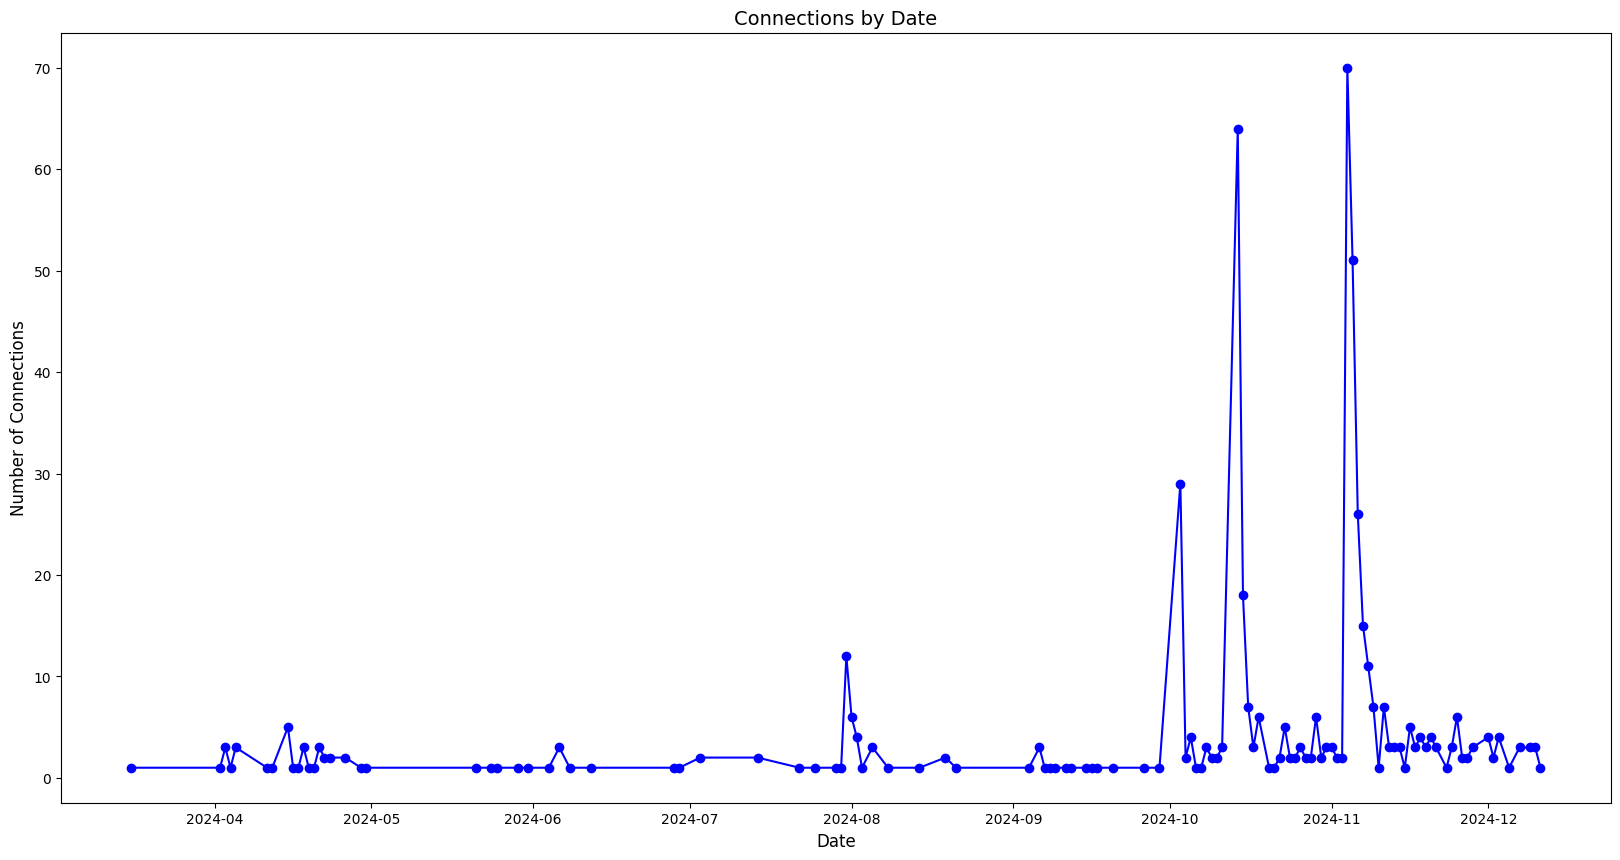

In [120]:

valid_dates = clean_df[6].apply(lambda x: pd.to_datetime(x, format='%d %b %Y', errors='coerce')).dropna() #getting the dates from connected on column as it had invalid data and applying lambda function to make the code smaller
sorted_dates = valid_dates.value_counts().sort_index().iloc[1:] #i droped the first date because it was way too far from the second date and i had only one connection in it and i got how many times each unique date exists
dates_only=sorted_dates.index #here i splitted the dates and its counts so i can plot a relation between them
counts = sorted_dates.values

# Creating the plot
plt.figure(figsize=(20, 10))
plt.plot(dates_only, counts, marker='o', linestyle='-', color='b')
# # Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Connections', fontsize=12)
plt.title('Connections by Date', fontsize=14)
plt.show()



**seeing the most job title my connections have**


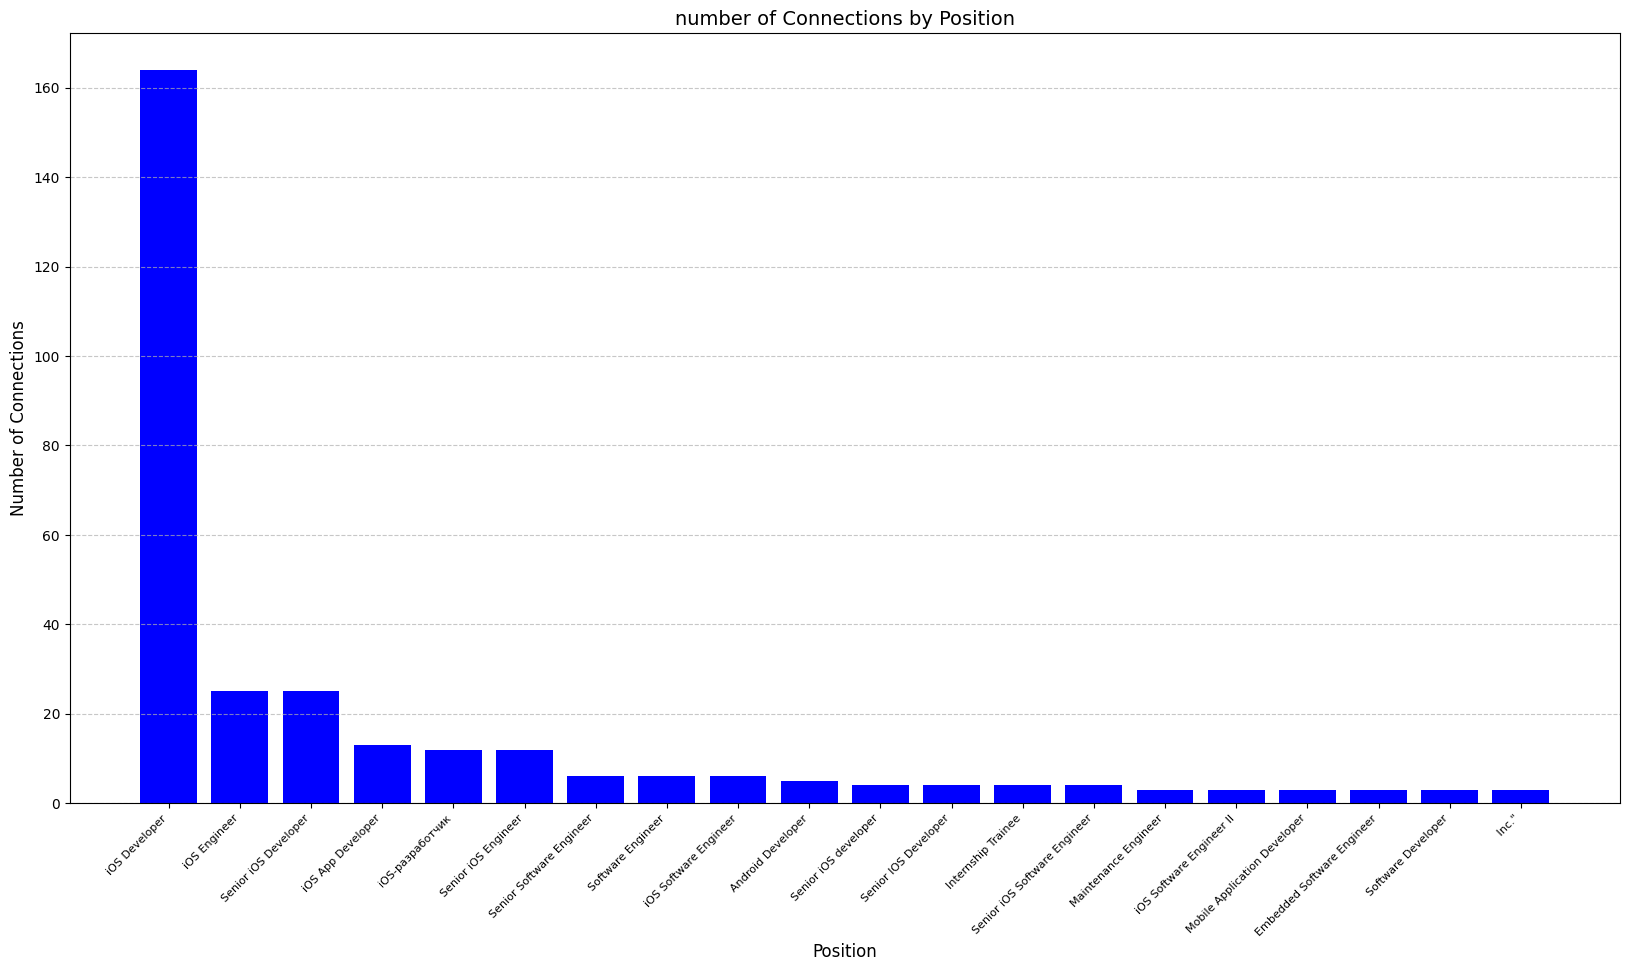

In [121]:
positions=clean_df[5].value_counts().drop("") #dropping the connections with empty job title
positions = positions[positions > 2] #dropping positions with less than 2 connections 
positions_names=positions.index
positions_counts=positions.values
plt.figure(figsize=(20, 10))
plt.bar(positions_names,positions_counts,color='b',alpha=1)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Number of Connections', fontsize=12)
plt.title('number of Connections by Position', fontsize=14)
plt.xticks(fontsize=8, rotation=45,ha='right') #adjusting the fontsize and orientation of xticks as there is long names and ensuring every tick is positioned right
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()




**seeing the company which i have most connections with**


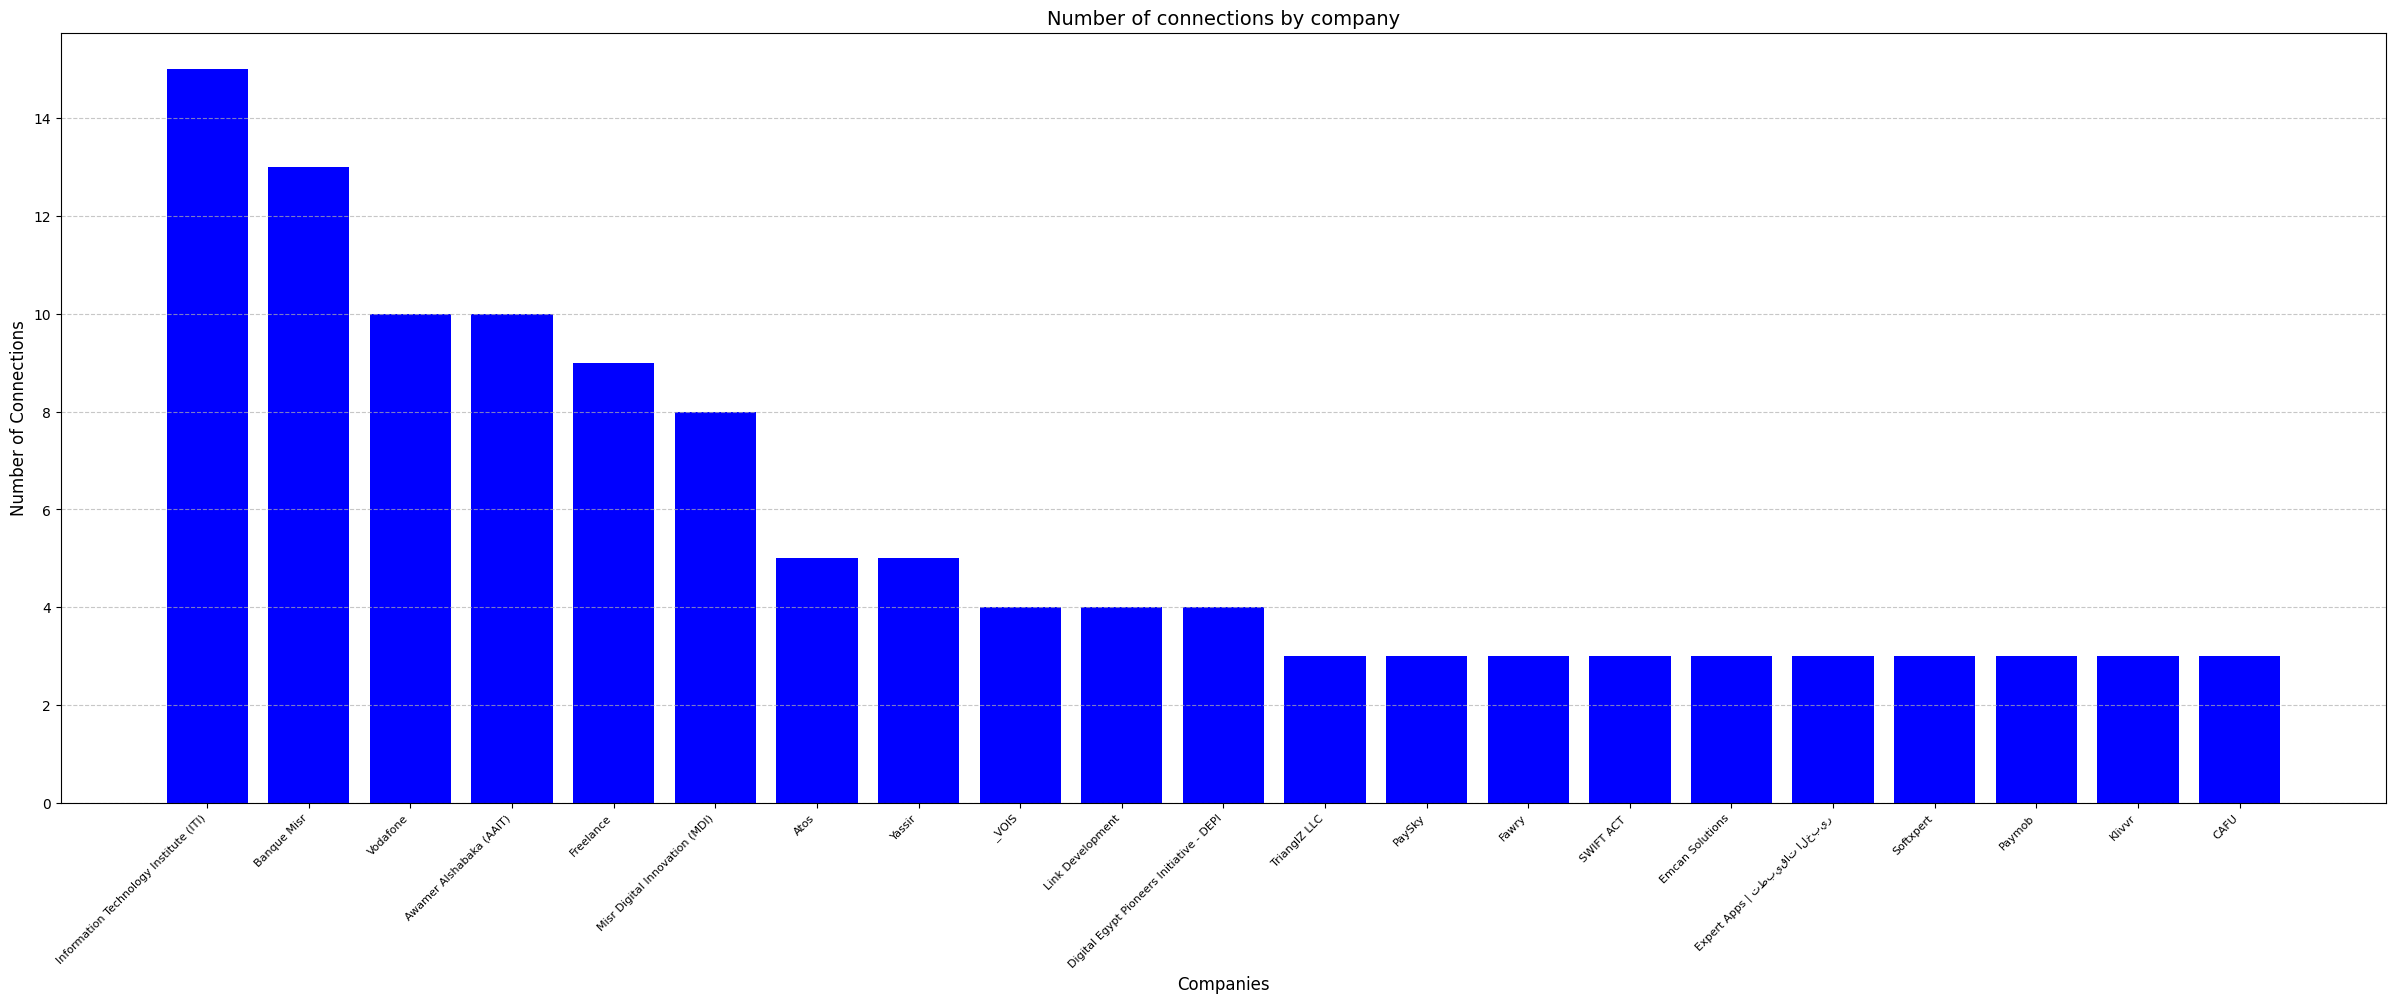

In [ ]:
#removing connections with no company name
companies=clean_df[4].value_counts().drop([""])
companies=companies[companies>2] #removing companies which i have less than 2 connections with
companies_names=companies.index #companies names
companies_counts=companies.values #count for each name
plt.figure(figsize=(30,10)) #adjusing the figure size to be bigger
plt.bar(companies_names,companies_counts,color='b',alpha=1) #making bar plot between companies and the number of connections
plt.xlabel('Companies' , fontsize=12)
plt.ylabel('Number of Connections',fontsize=12)
plt.title('Number of connections by company',fontsize=14)
plt.xticks(fontsize=8,rotation=45,ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**seeing the most repeated first names in my connections**


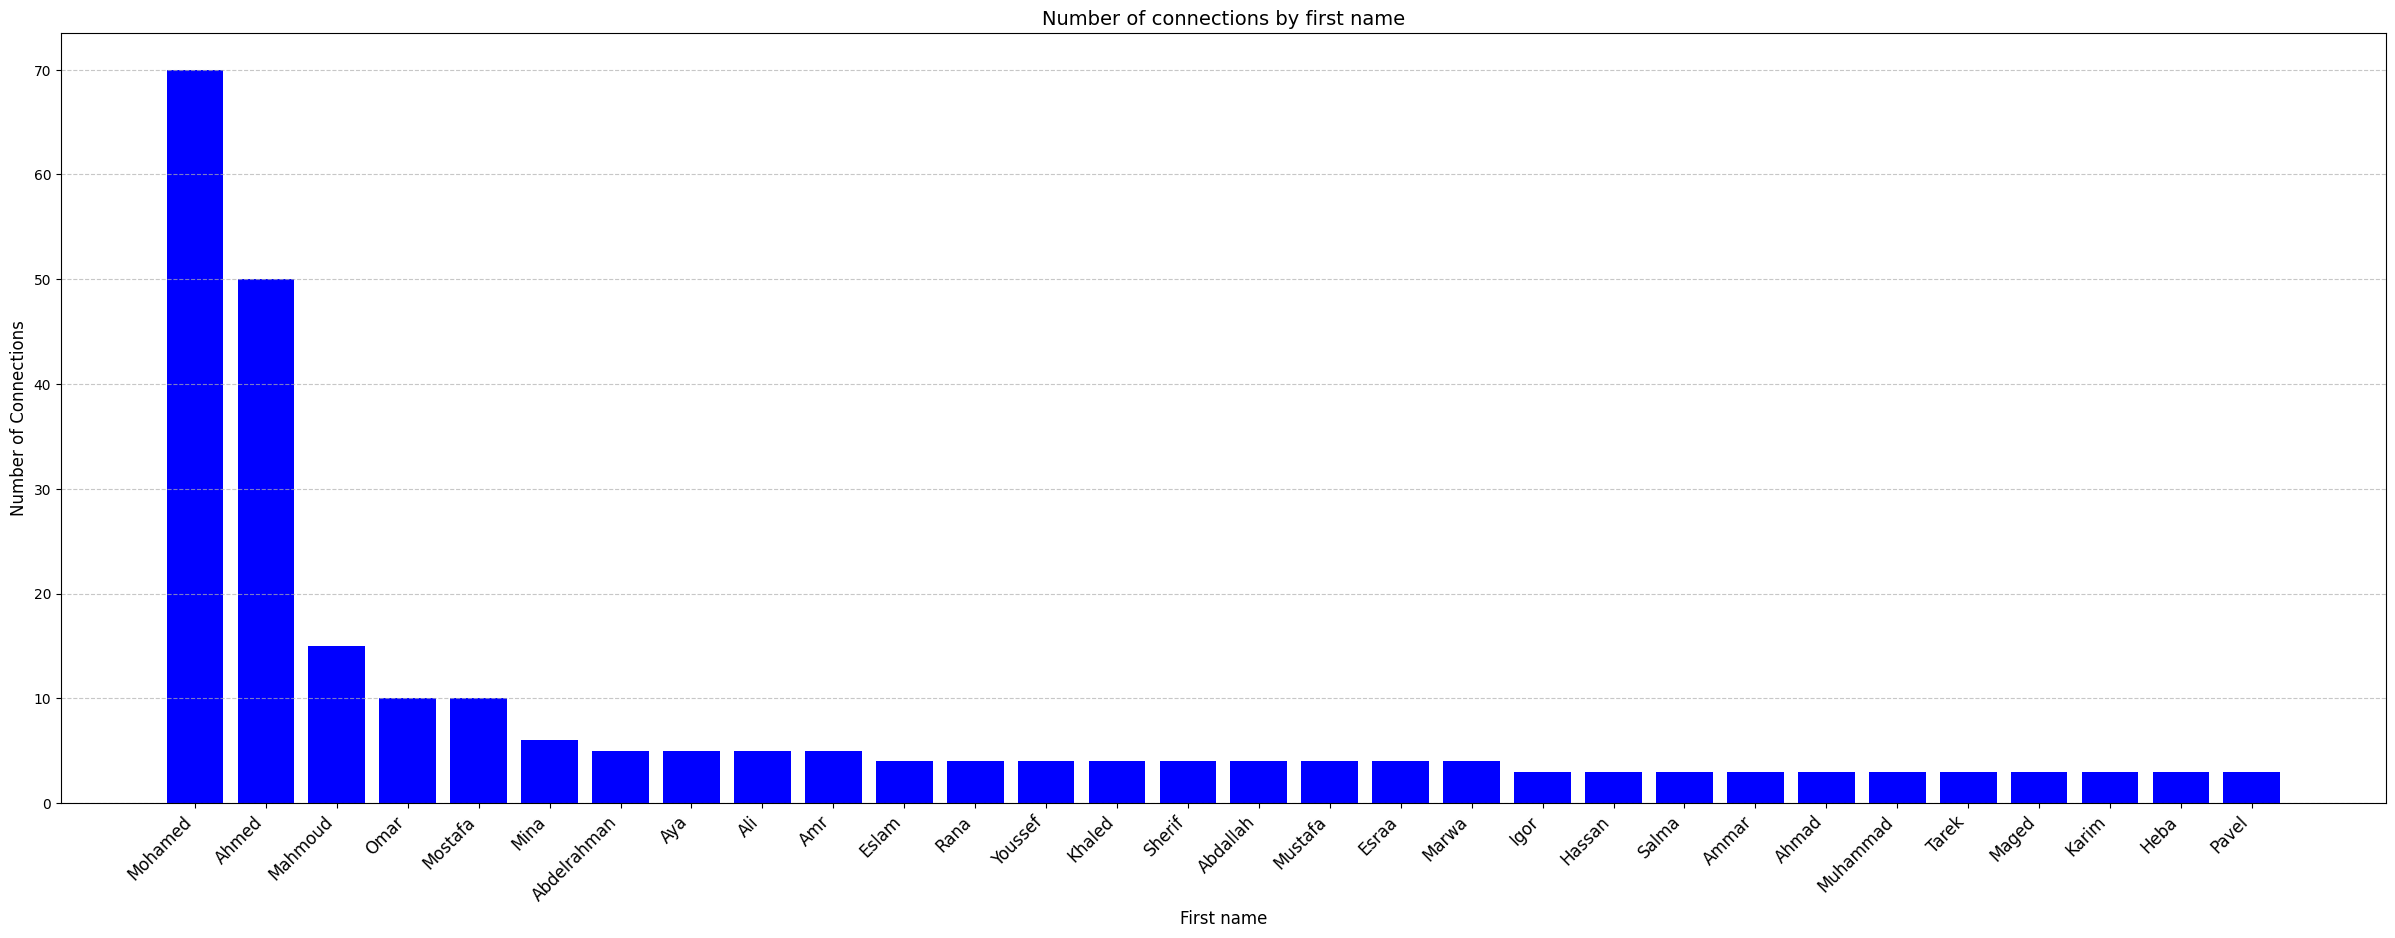

In [ ]:
clean_df[0] = clean_df[0].replace({'Mohammed': 'Mohamed'}) #making mohamed and mohammed as one name as they are the same but typed in different way
first_names=clean_df[0].value_counts()
first_names=first_names[first_names>2] #removing first names which i have less than 2 connections 
first_name=first_names.index #unique names
first_names_counts=first_names.values #count for each unique name
plt.figure(figsize=(30,10))
plt.bar(first_name,first_names_counts,color='b',alpha=1) #bar plot between names and its count 
plt.xlabel('First name' , fontsize=12)
plt.ylabel('Number of Connections',fontsize=12)
plt.title('Number of connections by first name',fontsize=14)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**seeing the most repeated last names in my connections**


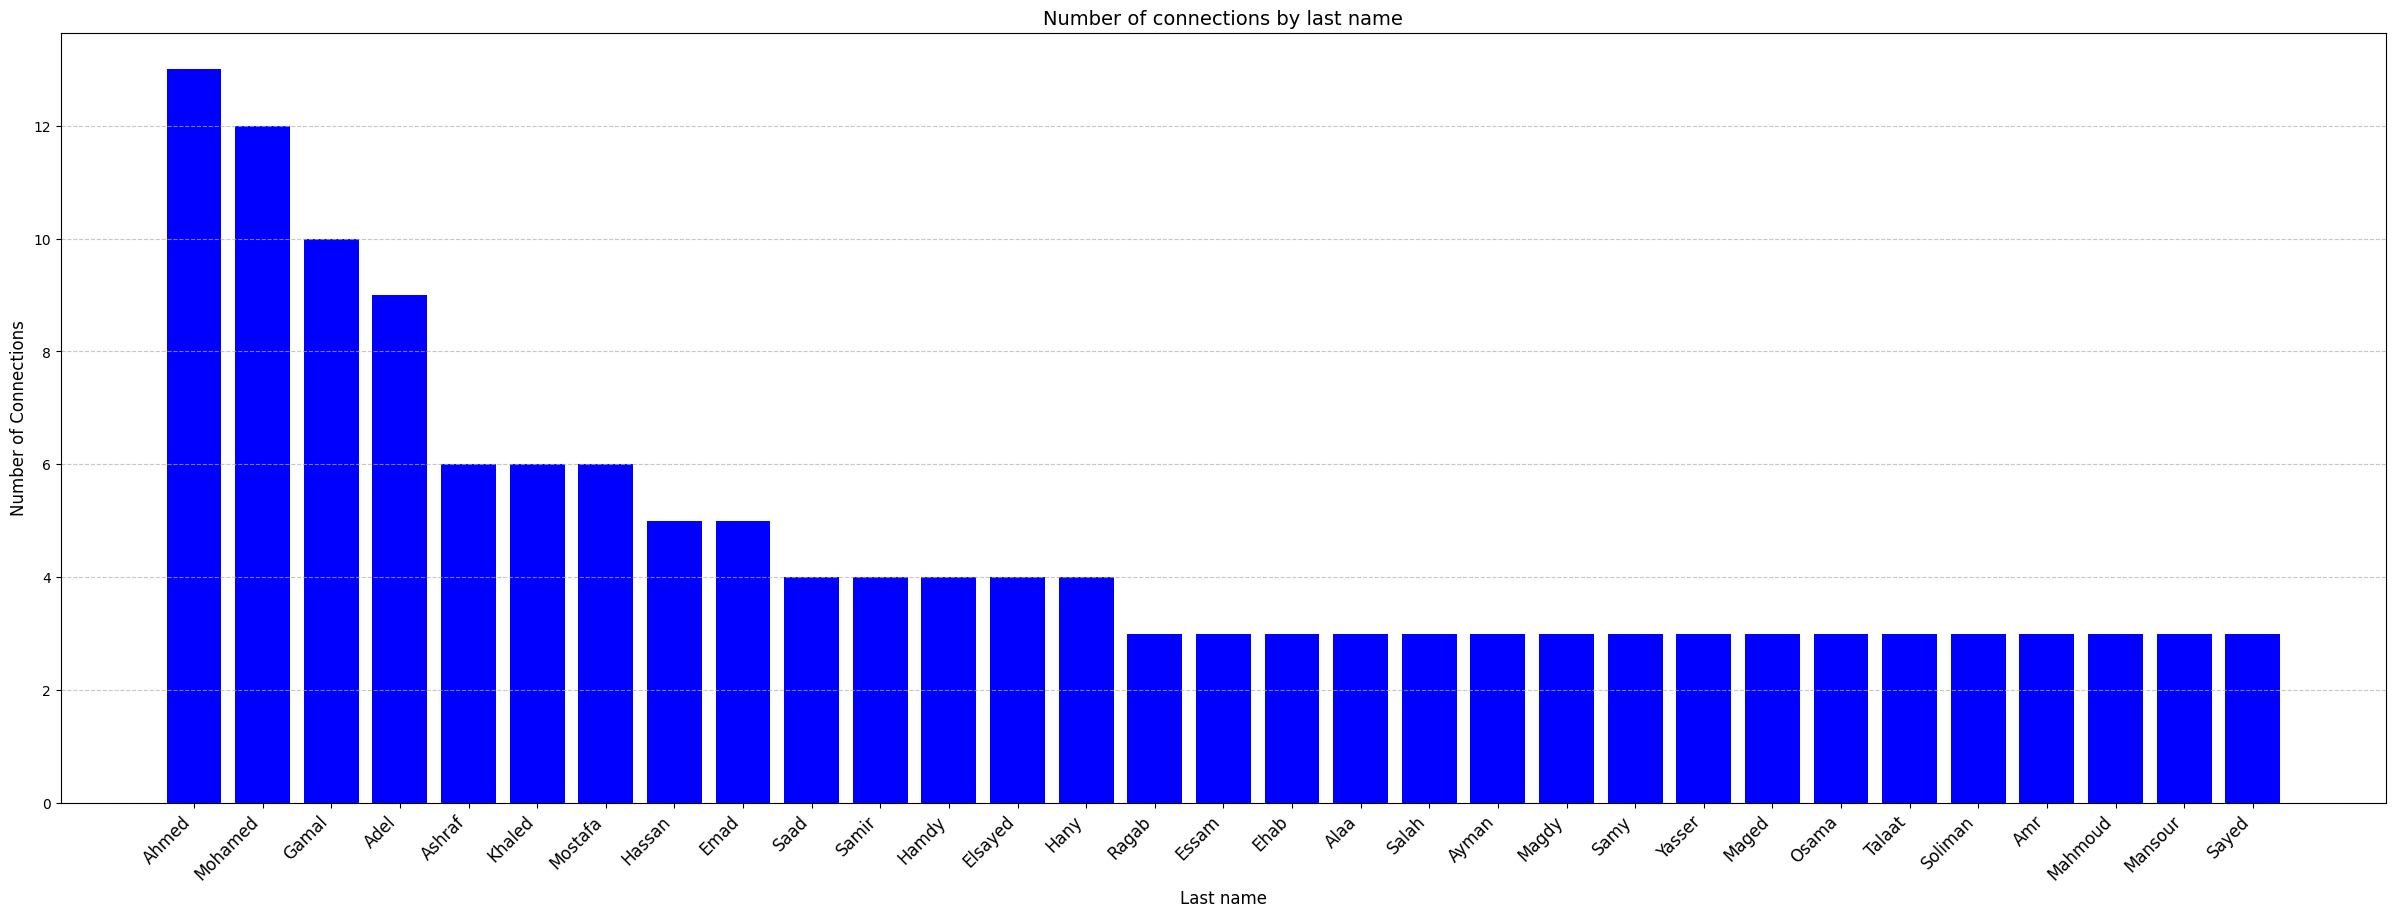

In [23]:
clean_df[1] = clean_df[1].replace({'Mohammed': 'Mohamed'}) #making mohamed and mohammed as one name as they are the same but typed in different way
first_names=clean_df[1].value_counts()
first_names=first_names[first_names>2]
first_name=first_names.index
first_names_counts=first_names.values
plt.figure(figsize=(30,10))
plt.bar(first_name,first_names_counts,color='b',alpha=1)
plt.xlabel('Last name' , fontsize=12)
plt.ylabel('Number of Connections',fontsize=12)
plt.title('Number of connections by last name',fontsize=14)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Now Going to Invitations File**


In [83]:
invitations_df = pd.read_csv(r'C:\Users\20109\Desktop\presentation\Invitations.csv', delimiter=',')
invitations_df.describe()
invitations_df.info()
invitations_df.isnull().sum() #in messages there is 573 na cell i will fill it with 0
invitations_df.fillna(0,inplace=True)
invitations_df.isnull().sum() 
invitations_df.head(5)


,From,To,Sent At,Message,Direction,inviterProfileUrl,inviteeProfileUrl
count,575,575,575,2,575,575,575
unique,153,420,258,2,2,154,423
top,Karim Hamed,Karim Hamed,"11/4/24, 9:13 AM",باشمهندس محمود ازي حضرتك انا كريم اللي باشمهند...,OUTGOING,https://www.linkedin.com/in/karimxhamed,https://www.linkedin.com/in/karimxhamed
freq,422,153,59,1,422,422,153


**How did the number of invitations sent, received, and accepted change over time?(combining data from multiple files)**


C:\Users\20109\AppData\Local\Temp\ipykernel_11096\1028001756.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sent_invitations = pd.to_datetime(invitations_df[invitations_df['From'] == 'Karim Hamed']['Sent At'], errors='coerce')
C:\Users\20109\AppData\Local\Temp\ipykernel_11096\1028001756.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  received_invitations = pd.to_datetime(invitations_df[invitations_df['To'] == 'Karim Hamed']['Sent At'], errors='coerce')


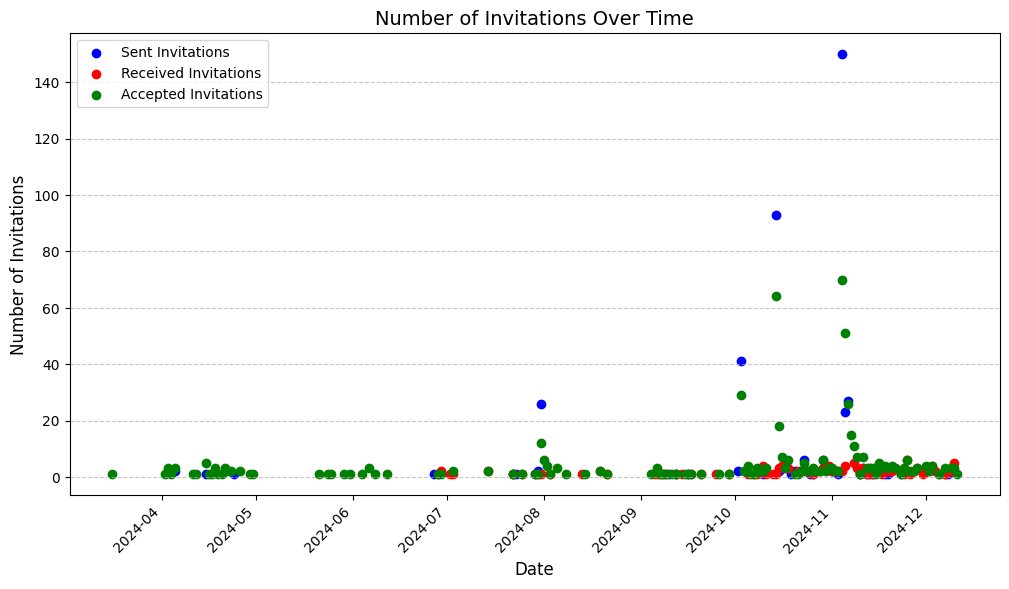

In [91]:
sent_invitations = pd.to_datetime(invitations_df[invitations_df['From'] == 'Karim Hamed']['Sent At'], errors='coerce')
sent_value_counts = sent_invitations.dt.date.value_counts().sort_index()

received_invitations = pd.to_datetime(invitations_df[invitations_df['To'] == 'Karim Hamed']['Sent At'], errors='coerce')
received_value_counts = received_invitations.dt.date.value_counts().sort_index()
sent_invitations.count(),received_invitations.count()
plt.figure(figsize=(12, 6))

plt.scatter(sent_value_counts.index, sent_value_counts.values,  marker='o',label='Sent Invitations', color='blue')
plt.scatter(received_value_counts.index, received_value_counts.values,marker='o', label='Received Invitations', color='red')
plt.scatter(dates_only, counts, marker='o', linestyle='-', label='Accepted Invitations(connections)' ,color='green')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Invitations', fontsize=12)
plt.title('Number of Invitations Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


**seeing the difference between sent and recieved invitations a day**


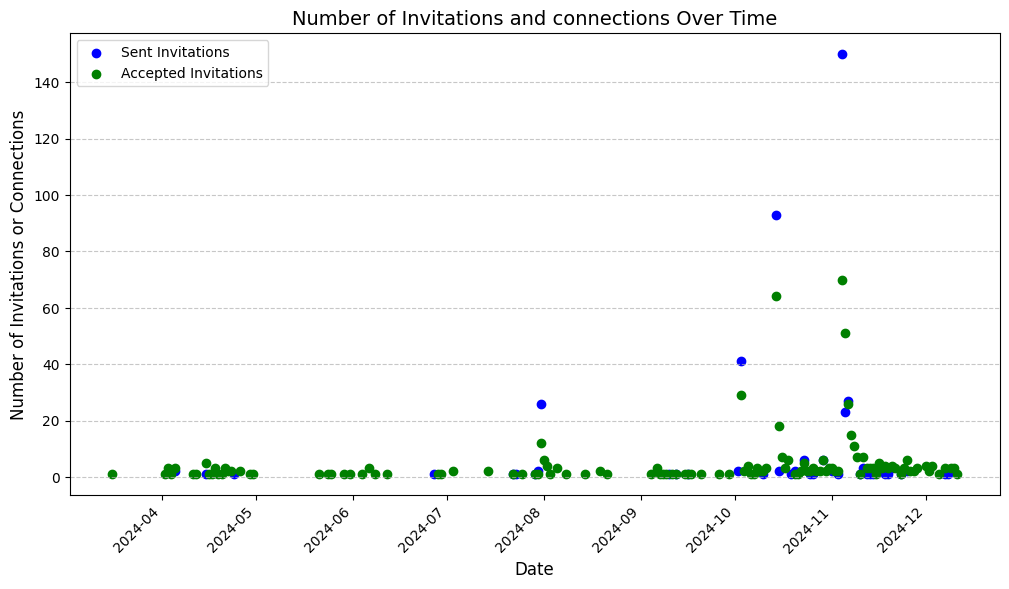

In [87]:

plt.figure(figsize=(12, 6))

plt.scatter(sent_value_counts.index, sent_value_counts.values,  marker='o',label='Sent Invitations', color='blue')
plt.scatter(dates_only, counts, marker='o', linestyle='-', label='Accepted Invitations' ,color='green')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Invitations or Connections', fontsize=12)
plt.title('Number of Invitations and connections Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**now going to the job applications file**


In [ ]:
jobs_df = pd.read_csv(r"C:\Users\20109\Desktop\presentation\Job Applications.csv", delimiter=',') #reading file using pandas , cleaning it and performing descriptive statistics on it
jobs_df.describe()
jobs_df.info()
jobs_df.isnull().sum() #checking for null values
jobs_df.fillna(0,inplace=True) #filling null values
jobs_df.head(15) #seeing first 15 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Application Date      113 non-null    object
 1   Contact Email         113 non-null    object
 2   Contact Phone Number  113 non-null    int64 
 3   Company Name          109 non-null    object
 4   Job Title             109 non-null    object
 5   Job Url               113 non-null    object
 6   Resume Name           113 non-null    object
 7   Question And Answers  100 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.2+ KB


,Application Date,Contact Email,Contact Phone Number,Company Name,Job Title,Job Url,Resume Name,Question And Answers
0,"11/17/24, 3:52 AM",karimhamed947@gmail.com,2001098807570,Momentum Solutions Co.,iOS Developer,http://www.linkedin.com/jobs/view/4076858239,Karim Hamed.pdf,What is your expected salary EGP/month (in tho...
1,"11/20/24, 4:21 AM",karimhamed947@gmail.com,2001098807570,Egrobots,iOS Developer,http://www.linkedin.com/jobs/view/4078812164,Karim Hamed.pdf,Mobile phone number:+20 01098807570 | Email ad...
2,"4/22/24, 9:37 AM",karimhamed947@gmail.com,2001098807570,CivicCraft Technologies,iOS Developer Intern,http://www.linkedin.com/jobs/view/3802141532,Karim Hamed.pdf,"Your title:Ios developer | City:Cairo, Egypt |..."
3,"11/21/24, 3:49 AM",karimhamed947@gmail.com,2001098807570,Arcsen,Senior iOS Mobile Application Developer,http://www.linkedin.com/jobs/view/3985048030,Karim Hamed.pdf,Dates of employment:2024-10-null - | Company:...
4,"5/5/24, 2:41 AM",karimhamed947@gmail.com,2001098807570,Institute of Trainers®,iOS Developer,http://www.linkedin.com/jobs/view/3917735286,Karim Hamed.pdf,0
5,"5/6/24, 3:03 AM",karimhamed947@gmail.com,2001098807570,2P Perfect Presentation,IOS Mobile Developer,http://www.linkedin.com/jobs/view/3864260623,Karim Hamed.pdf,0
6,"8/1/24, 6:46 AM",karimhamed947@gmail.com,2001098807570,iSchool,Coding Course Presenter,http://www.linkedin.com/jobs/view/3980839797,Karim Hamed.pdf,First name:Karim | Email address:karimhamed947...
7,"10/22/24, 4:39 AM",karimhamed947@gmail.com,2001098807560,WideNet Consulting Group,iOS Developer,http://www.linkedin.com/jobs/view/4051229379,Karim Hamed.pdf,Mobile phone number:+20 01098807560 | Please s...
8,"11/17/24, 3:51 AM",karimhamed947@gmail.com,2001098807570,PnPAI,iOS Developer,http://www.linkedin.com/jobs/view/4076852717,Karim Hamed.pdf,Please submit a resume or LinkedIn profile:-16...
9,"8/23/24, 5:33 AM",karimhamed947@gmail.com,2001098807570,Khazna,iOS Developer,http://www.linkedin.com/jobs/view/4004903957,Karim Hamed.pdf,Email address:karimhamed947@gmail.com | Mobile...


**showing the most job titles i applied for**


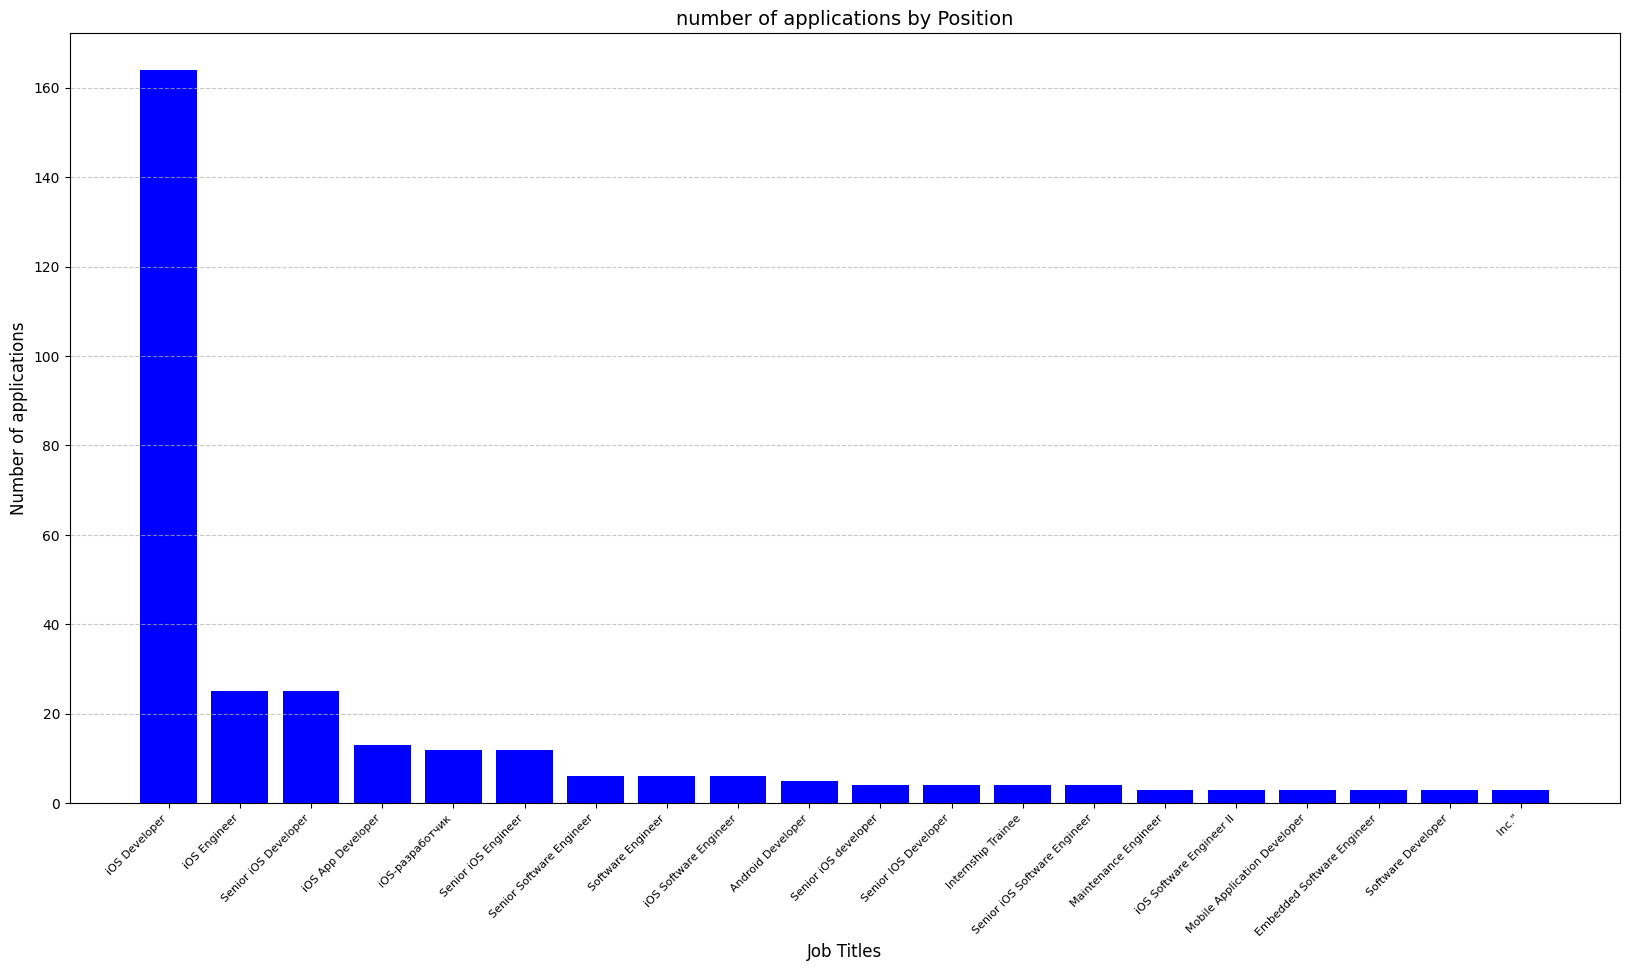

In [105]:
job_title=jobs_df['Job Title'].value_counts().drop(0) #dropping the applications with null job title
job_title_names=positions.index  #job title unique names
job_title_counts=positions.values #count for each unique title
plt.figure(figsize=(20, 10)) #making bar plot using matplotlib for unique titles and thier names
plt.bar(job_title_names,job_title_counts,color='b',alpha=1)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Number of applications', fontsize=12)
plt.title('number of applications by Position', fontsize=14)
plt.xticks(fontsize=8, rotation=45,ha='right') #adjusting the fontsize and orientation of xticks as there is long names and ensuring every tick is positioned right
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()

**seeing the most company i applied for**


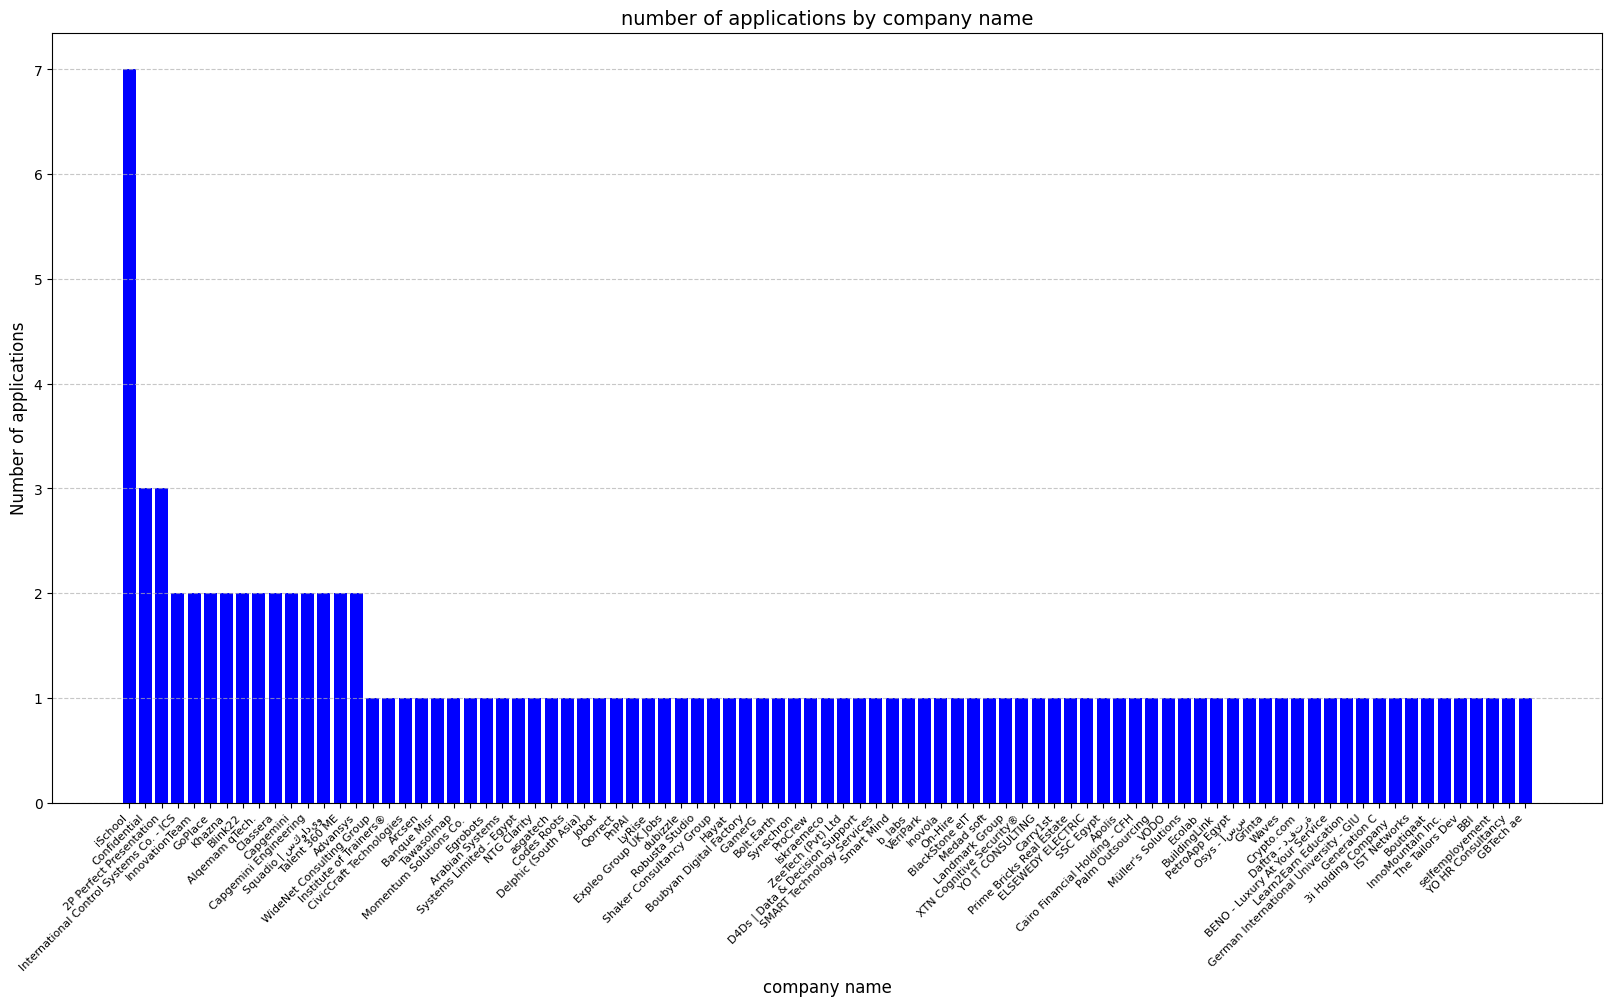

In [108]:
company_name=jobs_df['Company Name'].value_counts().drop(0) #dropping the applications with empty compny name
company_names=company_name.index #unique names for companies
company_counts=company_name.values #coiunt for each unique company name
plt.figure(figsize=(20, 10)) #drawing bar plot between each company and its count
plt.bar(company_names,company_counts,color='b',alpha=1)
plt.xlabel('company name', fontsize=12)
plt.ylabel('Number of applications', fontsize=12)
plt.title('number of applications by company name', fontsize=14)
plt.xticks(fontsize=8, rotation=45,ha='right') #adjusting the fontsize and orientation of xticks as there is long names and ensuring every tick is positioned right
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()

**seeing applied applications change over time**


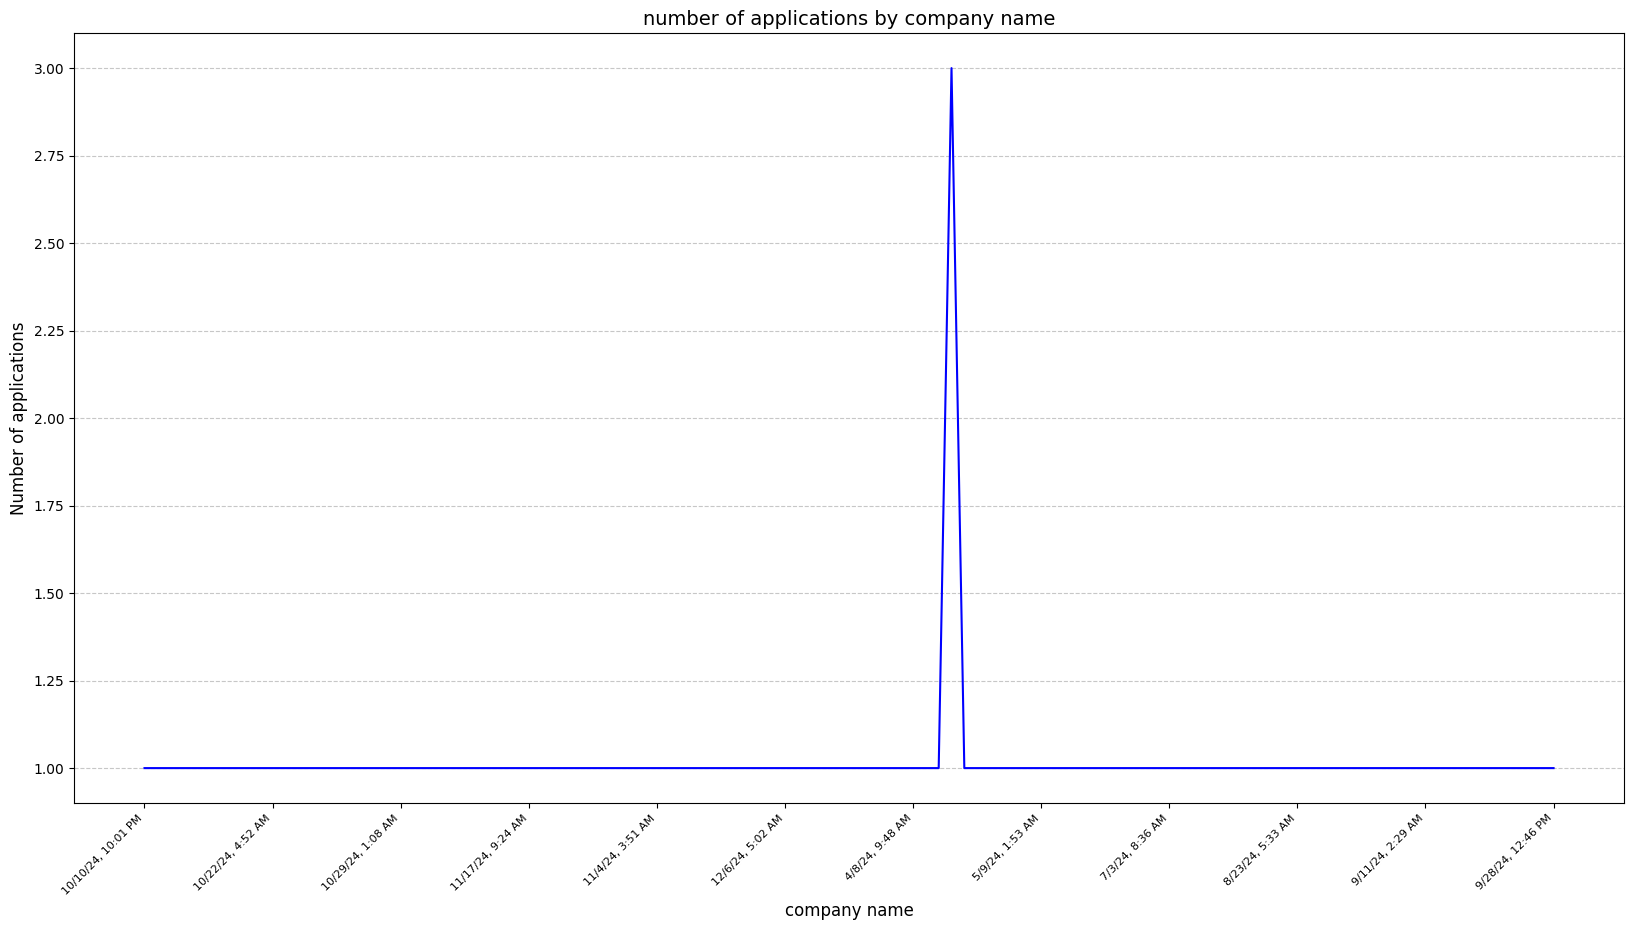

In [117]:
application_date=jobs_df['Application Date'].value_counts().sort_index()
application_dates=application_date.index
company_counts=application_date.values
plt.figure(figsize=(20, 10))
plt.plot(application_dates,company_counts,color='b',alpha=1)
plt.xlabel('company name', fontsize=12)
plt.ylabel('Number of applications', fontsize=12)
plt.title('number of applications by company name', fontsize=14)
plt.xticks(application_dates[::10],fontsize=8, rotation=45,ha='right') #adjusting the fontsize and orientation of xticks as there is long names and ensuring every tick is positioned right
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()

**I used:-<br>**

1.numpy to load the files ,perform descriptive statistics on it , clean it , removing null values and make it suitable to be drawn.<br>
2.matplotlib to draw relatons between variables using scatter plot,bar plot and line plot.<br>
3.i used three files which is incitations,job applications&connections (and i made a relation between two files invitations and connections).<br>

**thing i knew from my data:-<br>**

1. I have 561 connections on LinkedIn.<br>
2. The month I had the most connections was November 2024 (exactly 04 Nov 2024).<br>
3. The most job title repeated in my connections is IOS Developer.<br>
4. The most companies I have connections with its employees are ITI, then Banque Misr, then Vodafone.<br>
5. From my connections, the most repeated first name is Mohamed.<br>
6. From my connections, the most repeated last name is Ahmed.<br>
7. I have 575 invitations (422 sent, 153 received).<br>
8. I have more invitations sent than received.<br>
9. The most job title I applied for is IOS Developer.<br>
10. The most company I applied a job application for is ISchool.<br>
11. Every time I apply for a job, I applied for one job per day except on 20/11/2024, when I applied for three jobs.<br>
